In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [10]:
#read the data
data = pd.read_csv('C:/Users/new/Desktop/train_V2.csv')

In [11]:
data.shape
# There are 4.4 million data

(4446966, 29)

In [12]:
data = data.dropna()
data.shape

(4446965, 29)

In [14]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
data.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [16]:
def merge_matchType(x):
    if x in {'normal-squad-fpp', 'crashfpp', 'crashtpp', 'normal-duo-fpp',
       'flarefpp', 'normal-solo-fpp', 'flaretpp', 'normal-duo',
       'normal-squad', 'normal-solo'}:
        return 'others'
    else:
        return x
# Merging match types to fewer numbers

In [17]:
data['matchType'] = data.matchType.apply(merge_matchType)

data.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'others'], dtype=object)

In [18]:
# Use get_dummies to assign dummy variables to match types and drop matchType_others
data_dumm = pd.get_dummies(data, columns=['matchType'])
data_dumm.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,weaponsAcquired,winPoints,winPlacePerc,matchType_duo,matchType_duo-fpp,matchType_others,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,1,1466,0.4444,0,0,0,0,0,0,1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,5,0,0.6400,0,0,0,0,0,0,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,2,0,0.7755,1,0,0,0,0,0,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,3,0,0.1667,0,0,0,0,0,0,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,2,0,0.1875,0,0,0,0,1,0,0


In [19]:
data_dumm = data_dumm.drop('matchType_others', axis=1)

In [20]:
data_dumm.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups',
       'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'winPlacePerc', 'matchType_duo', 'matchType_duo-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp'],
      dtype='object')

In [21]:
data = data_dumm.loc[:,['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups',
       'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'matchType_duo', 'matchType_duo-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp', 'winPlacePerc']]

In [22]:
print(data.shape)
data.head()

(4446965, 34)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,walkDistance,weaponsAcquired,winPoints,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,244.80,1,1466,0,0,0,0,0,1,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,1434.00,5,0,0,0,0,0,0,1,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,161.80,2,0,1,0,0,0,0,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,202.70,3,0,0,0,0,0,0,1,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,49.75,2,0,0,0,0,1,0,0,0.1875


In [23]:
# split data into X and y
X = data.iloc[:,3:33]
Y = data.iloc[:,33]
X.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,244.80,1,1466,0,0,0,0,0,1
1,0,0,91.47,0,0,0,57,0,0,0,...,0,1434.00,5,0,0,0,0,0,0,1
2,1,0,68.00,0,0,0,47,0,0,0,...,0,161.80,2,0,1,0,0,0,0,0
3,0,0,32.90,0,0,0,75,0,0,0,...,0,202.70,3,0,0,0,0,0,0,1
4,0,0,100.00,0,0,0,45,0,1,1,...,0,49.75,2,0,0,0,0,1,0,0


In [24]:
# split data into train and test sets
# 67% for training, 33% for testing
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [25]:
# For this training, going with the regression objective as the output is numeric. 
# The evaluation metric is Mean Absolute Error.

d_train = lgb.Dataset(X_train, label=y_train)

params = {}
params['objective'] = 'regression'
params['metric'] = 'mae'

In [26]:
model = lgb.train(params, d_train)

In [27]:
#Prediction
y_pred=model.predict(X_test)

In [28]:
y_pred

array([0.3020123 , 0.90710021, 0.45506675, ..., 0.78159561, 0.28817006,
       0.49578486])

In [29]:
pd.Series(y_pred).plot(kind='hist',bins=10)

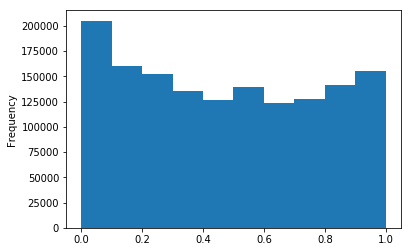

In [30]:
pd.Series(y_test).plot(kind='hist', bins=10)

In [31]:
# evaluate predictions
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {}".format(mae))

MAE: 0.05971040027550243


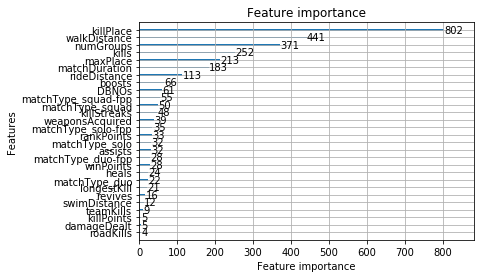

In [32]:
lgb.plot_importance(model)
# Plot the feature importance. 
# killPlace is the most important feature, followed by walkDistance and kills

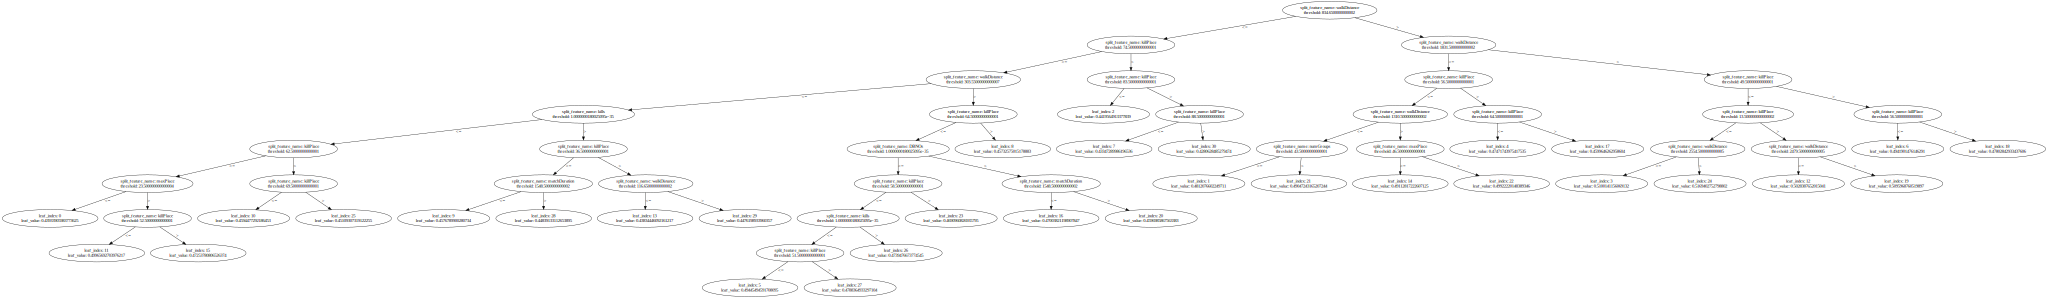

In [33]:
# Tree of LightGBM model
lgb.create_tree_digraph(model)

In [34]:
data_pred = pd.concat([X_test, y_test], axis=1)
data_pred = pd.concat([data_pred.reset_index(), pd.Series(y_pred)],axis=1)

In [35]:
data_pred.head()

,index,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,weaponsAcquired,winPoints,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,winPlacePerc,0
0,1146786,0,0,0.00,0,0,0,70,0,0,...,3,0,0,1,0,0,0,0,0.2979,0.302012
1,4068275,0,0,42.57,0,0,0,44,1220,0,...,2,1540,0,0,0,0,0,1,0.9286,0.907100
2,3384766,0,1,0.00,0,0,4,59,0,0,...,4,0,0,0,0,1,0,0,0.4667,0.455067
3,1127095,1,1,152.90,1,1,7,26,0,1,...,3,0,0,0,0,0,0,1,0.6071,0.643038
4,396463,1,4,128.30,2,0,0,33,1214,1,...,7,1489,0,0,0,0,1,0,0.5000,0.540420


In [36]:
# Credit: https://www.kaggle.com/anycode/simple-nn-baseline-4
# This is some post-processing tricks
data_pred['pred_winPlacePerc'] = data_pred.iloc[:,-1]
def adjust_pred(x):
    space = 1/(x.maxPlace-1)
    return round(x.pred_winPlacePerc / space) * space

data_pred['adj_winPlacePerc'] = adjust_pred(data_pred)

In [37]:
mae = mean_absolute_error(data_pred.winPlacePerc, data_pred.adj_winPlacePerc)
print("MAE: {}".format(mae))

MAE: 0.05921600893001711


In [38]:
d_train_full = lgb.Dataset(X, label=Y)
# Train the full dataset
params = {}
params['objective'] = 'regression'
params['metric'] = 'mae'

In [39]:
model_full = lgb.train(params, d_train_full)

In [41]:
X_submit = pd.read_csv('C:/Users/new/Desktop/test_V2.csv')

In [42]:
print(X_submit.shape)
X_submit.head()

(1934174, 28)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [43]:
X_submit['matchType'] = X_submit.matchType.apply(merge_matchType)

X_submit.matchType.unique()

array(['squad-fpp', 'duo-fpp', 'squad', 'solo-fpp', 'solo', 'duo',
       'others'], dtype=object)

In [44]:
X_submit_dumm = pd.get_dummies(X_submit, columns=['matchType'])
X_submit_dumm.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,walkDistance,weaponsAcquired,winPoints,matchType_duo,matchType_duo-fpp,matchType_others,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,588.0,1,0,0,0,0,0,0,0,1
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,2017.0,6,0,0,1,0,0,0,0,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,787.8,4,0,0,0,0,0,0,0,1
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1812.0,3,0,0,1,0,0,0,0,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,2963.0,4,0,0,0,0,0,0,0,1


In [45]:
X_submit_dumm = X_submit_dumm.drop('matchType_others', axis=1)

X_submit = X_submit_dumm.loc[:,['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups',
       'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'matchType_duo', 'matchType_duo-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp']]

X_submit.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,0,588.0,1,0,0,0,0,0,0,1
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,0,2017.0,6,0,0,1,0,0,0,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,0,787.8,4,0,0,0,0,0,0,1
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,0,1812.0,3,0,0,1,0,0,0,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,0,2963.0,4,0,0,0,0,0,0,1


In [46]:
#Prediction
y_pred_submit=model_full.predict(X_submit.iloc[:,3:33])

In [47]:
y_pred_submit

array([0.25030114, 0.93985007, 0.65014456, ..., 0.88077514, 0.82868845,
       0.07703618])

In [48]:
#Submission file
submission = pd.concat([X_submit,pd.Series(y_pred_submit, name='winPlacePerc')], axis=1)

submission.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,walkDistance,weaponsAcquired,winPoints,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,winPlacePerc
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,588.0,1,0,0,0,0,0,0,1,0.250301
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,2017.0,6,0,0,1,0,0,0,0,0.939850
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,787.8,4,0,0,0,0,0,0,1,0.650145
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1812.0,3,0,0,1,0,0,0,0,0.536382
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,2963.0,4,0,0,0,0,0,0,1,0.922469


In [49]:
submission['pred_winPlacePerc'] = submission.iloc[:,-1]
def adjust_pred(x):
    space = 1/(x.maxPlace-1)
    return round(x.pred_winPlacePerc / space) * space

submission['adj_winPlacePerc'] = adjust_pred(submission)

submission.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,winPlacePerc,pred_winPlacePerc,adj_winPlacePerc
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,0,0,0,0,0,0,1,0.250301,0.250301,0.259259
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,0,0,1,0,0,0,0,0.939850,0.939850,0.936170
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,0,0,0,0,0,0,1,0.650145,0.650145,0.666667
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,0,0,1,0,0,0,0,0.536382,0.536382,0.545455
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,0,0,0,0,0,0,1,0.922469,0.922469,0.925926


In [50]:
submission = submission.loc[:,['Id','adj_winPlacePerc']]
submission.columns = ['Id','winPlacePerc']
submission.head()

,Id,winPlacePerc
0,9329eb41e215eb,0.259259
1,639bd0dcd7bda8,0.936170
2,63d5c8ef8dfe91,0.666667
3,cf5b81422591d1,0.545455
4,ee6a295187ba21,0.925926


In [51]:
submission.to_csv('submission.csv', index=False)
# The score is 0.057